# Importing Libraries

In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
lead_data=pd.read_csv("Leads.csv")

In [3]:
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
100*lead_data.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

There are many columns which have more that 40% null values, so dropping them

In [6]:
lead_data = lead_data.drop(columns=['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index',
                     'Asymmetrique Activity Index','Lead Quality'])

In [7]:
100*lead_data.isnull().mean().sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [8]:
lead_data.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
How did you hear about X Education                 10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
What matters most to you in choosing a course       3
Converted                                           2
Do Not Call                 

# Data Cleaning and Modelling
in decending order of null values

Handling the 'Select' level that is present in many of the categorical variables.
* We observe that there are 'Select' values in many columns.
* It may be because the customer did not select any option from the  list, hence it shows 'Select'.
* 'Select' values are as good as NULL. So we can convert these values to null values.

In [9]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [10]:
100*lead_data.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [11]:
lead_data = lead_data.drop(columns=['How did you hear about X Education','Lead Profile'])

In [12]:
100*lead_data.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

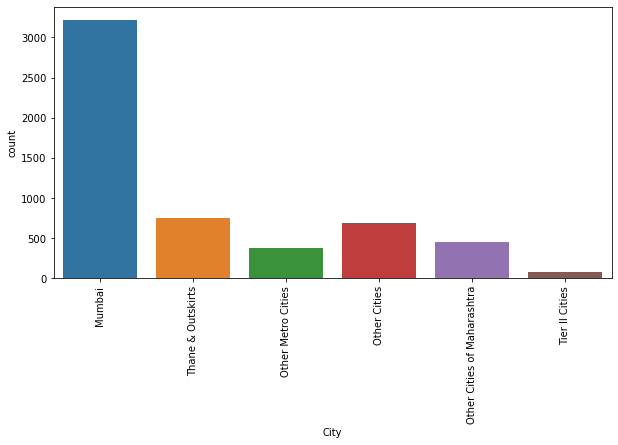

In [13]:
# Visualizing City column
plt.figure(figsize=(10,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)
plt.show()

* most ofthe leads are from mumbai

In [14]:
# imputing with mode values for categorical column
mod=lead_data["City"].mode()[0]
lead_data["City"]=lead_data["City"].fillna(mod)

In [15]:
100*lead_data['City'].isnull().mean()

0.0

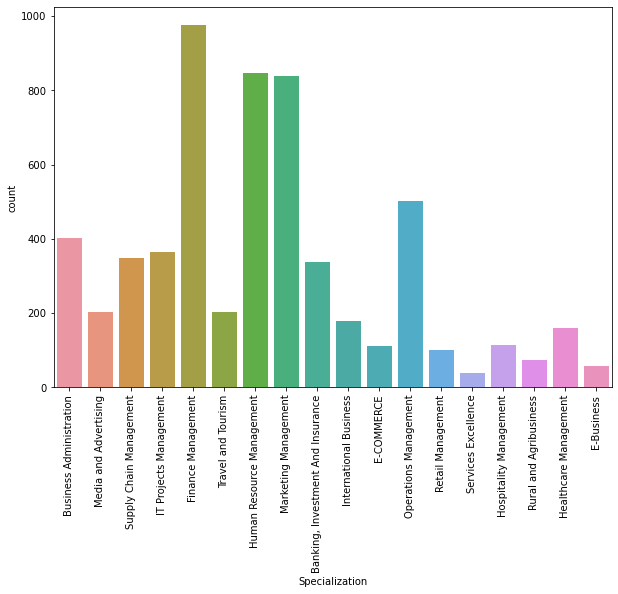

In [16]:
# Visualizing Specialization column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [17]:
#assuming the user may have not found his specialization in the dropdown,
#Creating a separate category called 'Others' and imputing to null values
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

In [18]:
100*lead_data['Specialization'].isnull().mean()

0.0

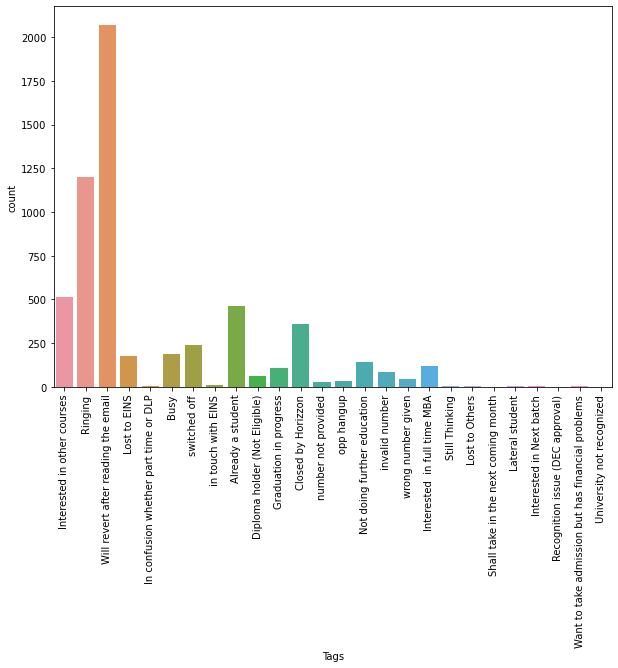

In [19]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)
plt.show()

In [20]:
# imputing with mode values for categorical column
mod=lead_data["Tags"].mode()[0]
lead_data["Tags"]=lead_data["Tags"].fillna(mod)

In [21]:
100*lead_data['Tags'].isnull().mean()

0.0

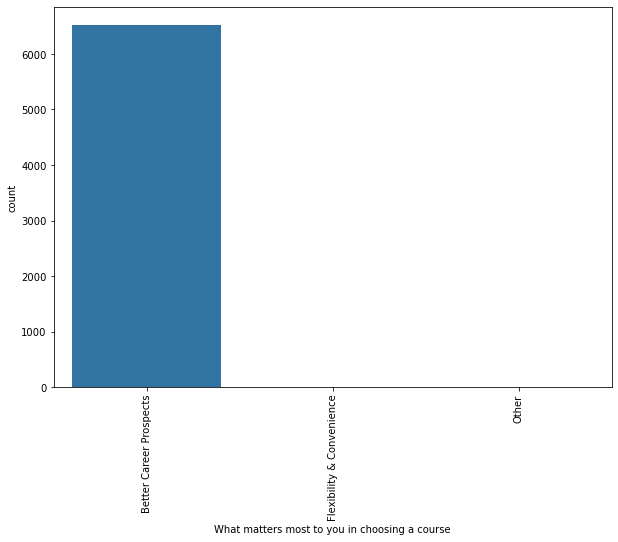

In [22]:
# Visualizing What matters most to you in choosing a course column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

We can see that this is highly skewed column so we can remove this column.

In [23]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

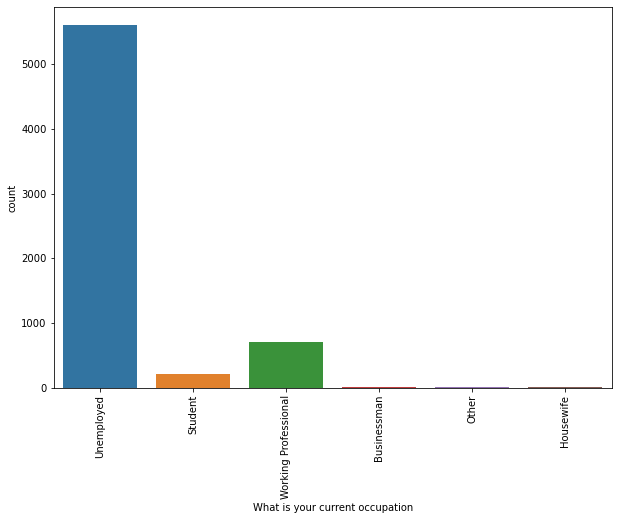

In [24]:
# Visualizing What is your current occupation column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [25]:
# imputing with mode values for categorical column
mod=lead_data["What is your current occupation"].mode()[0]
lead_data["What is your current occupation"]=lead_data["What is your current occupation"].fillna(mod)

In [26]:
100*lead_data['What is your current occupation'].isnull().mean()

0.0

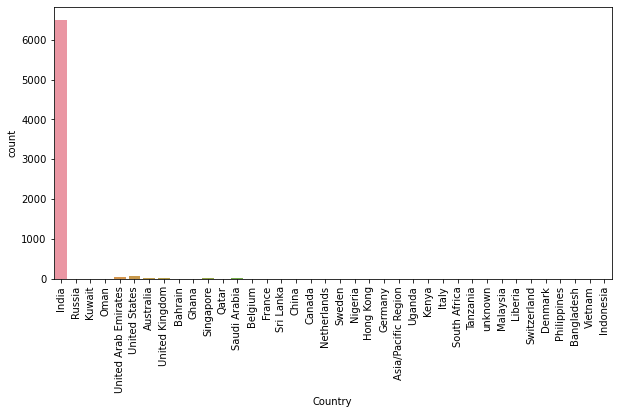

In [27]:
# Visualizing Country column
plt.figure(figsize=(10,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)
plt.show()

* the data is highly skewed but also an important column, so imputing with mode value

In [28]:
# imputing with mode values for categorical column
mod=lead_data["Country"].mode()[0]
lead_data["Country"]=lead_data["Country"].fillna(mod)
100*lead_data['Country'].isnull().mean()

0.0

Since rest of the columns have less than 2% missing values, dropping the rows

TotalVisits-1.482684, 
Page Views Per Visit-1.482684, 
Last Activity-1.114719, 
Lead Source-0.389610

In [29]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [30]:
100*lead_data.isnull().mean().sort_values(ascending=False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

# EDA

In [31]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted']))*100
Converted

37.85541106458012

* Lead convertion rate is around 38%

# Lead Origin

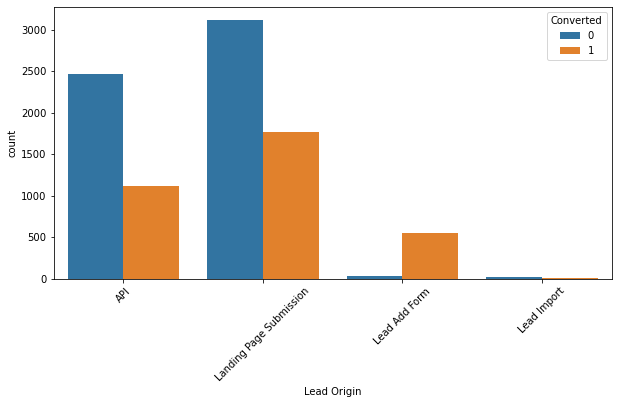

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.xticks(rotation = 45)
plt.show()

* API and Landing Page Submission has high origin but less conversion
* Lead Add Form has high convertion rate but less count

# Lead Source

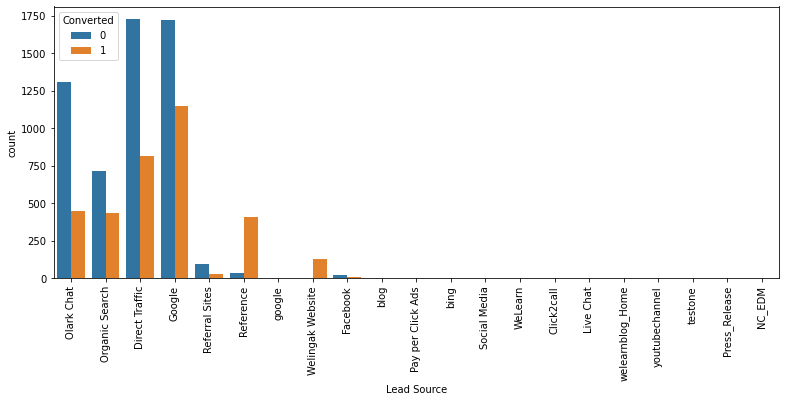

In [33]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [34]:
lead_data['Lead Source']=lead_data['Lead Source'].replace(['google'],'Google')

In [35]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

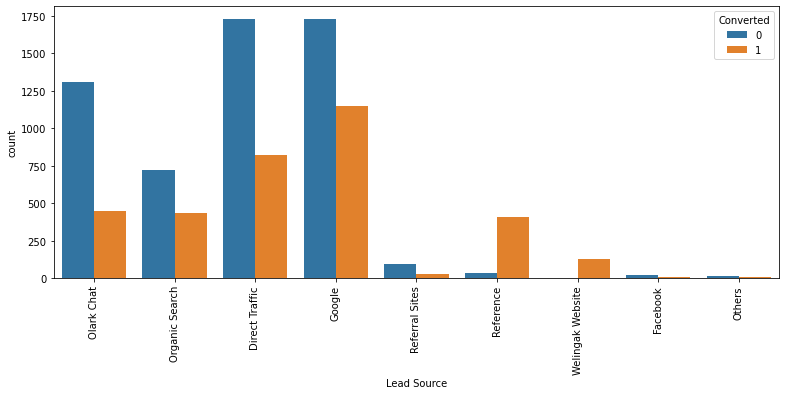

In [36]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

* High convertion is observed from 'Reference' and 'Welingak Website' sources

# Do not Email 

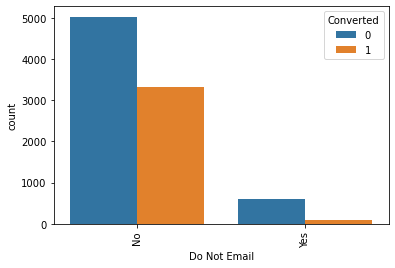

In [37]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

# Do not call

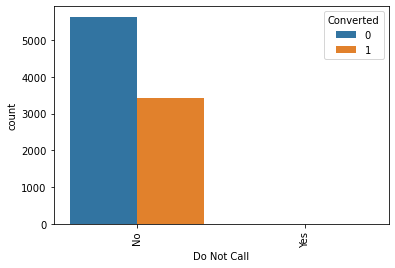

In [38]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

# Total Visits

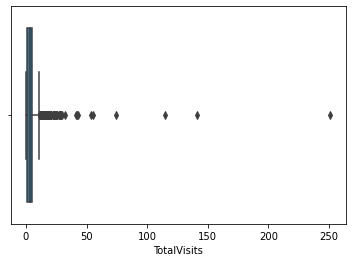

In [39]:
sns.boxplot(lead_data['TotalVisits'])
plt.show()

* Outlies are found. Capping the values between 5-95%

In [40]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

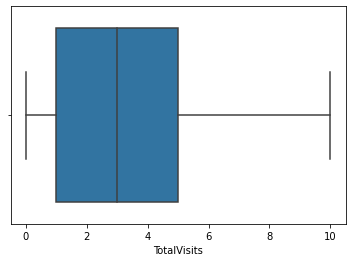

In [41]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'])

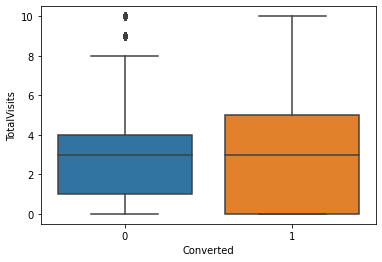

In [42]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

* Even though the leads who have converted visited the site more number of times, 
    the mean is almost same for converted and non converted

# Total Time Spent on Website

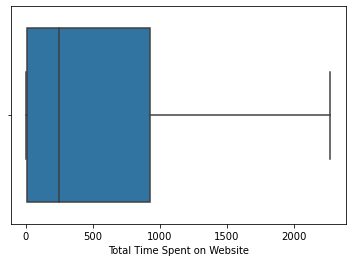

In [43]:
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.show()

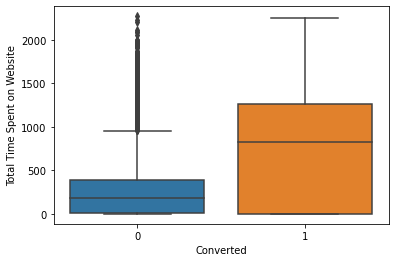

In [44]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted',data = lead_data)
plt.show()

* Those who spent more time in the website converted than who spent less, its necessary to build a interactive and impressive website

# Page Views Per Visit

<AxesSubplot:xlabel='Page Views Per Visit'>

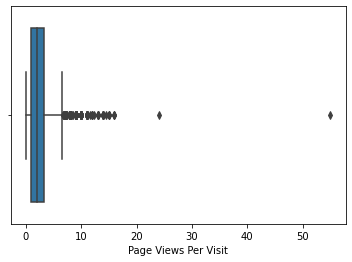

In [45]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert')

* Outlies are found. Capping the values between 5-95%

In [46]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

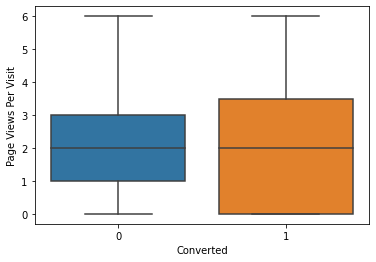

In [47]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data)
plt.show()

# Specialization

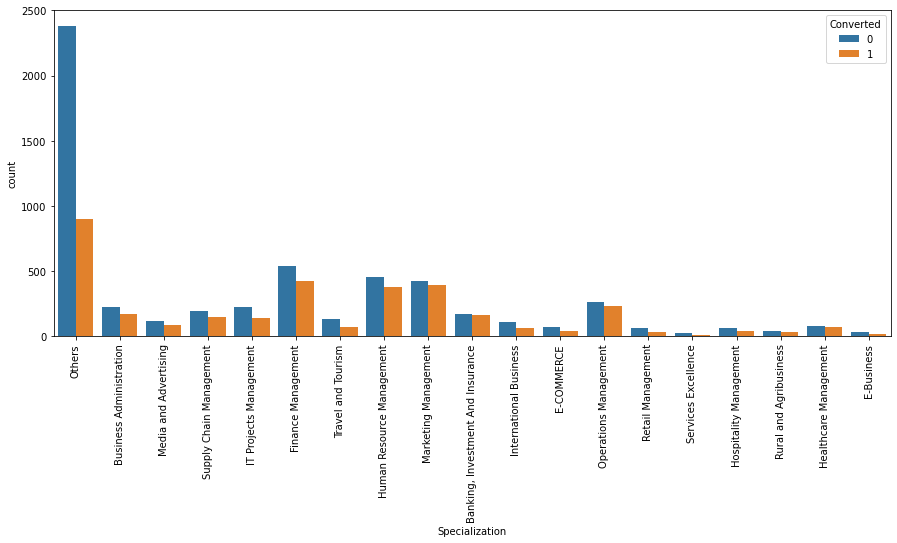

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

* candidates having specializations mentioned in the dropdown have high coverstion rate than 'others' 

# What is your current occupation

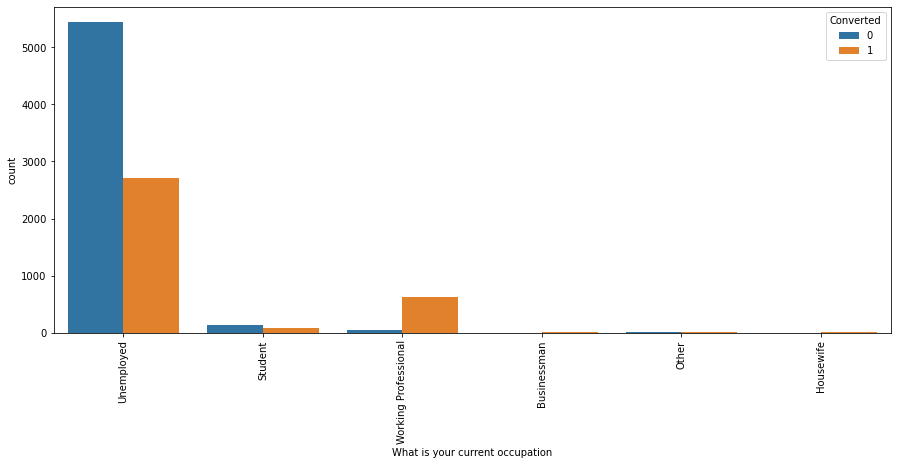

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

* Data is highly skewed but also Working Professionals have very high convertion rate

# City

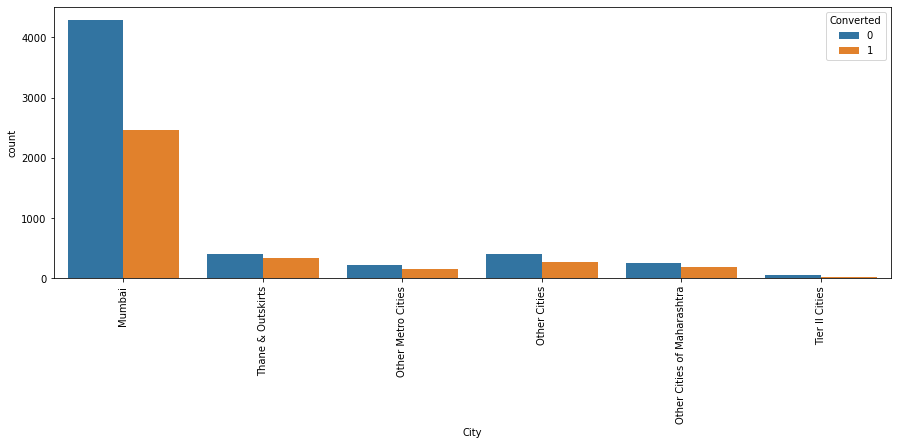

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

* maximum leads are from mumbai and it has more than 50% convertion rate

### Results
**Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis**

In [51]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [52]:
lead_data.shape

(9074, 14)

In [53]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

# Data Preparation

## Converting few binary variables (Yes/No) to 1/0

In [54]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

# Creating Dummy variables for the categorical Columns

In [55]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


**Dropping the columns for which dummies were created**

In [57]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [58]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Splitting the data into  train and test set.

In [59]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [60]:
# Putting target variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Splitting the data into train and test

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling the features

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Feature Selection Using RFE

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [64]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False])

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 32),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Marked Spam', False, 12),
 ('Last Activity_Email Opened', False, 44),
 ('Last Activity_Email Received', False, 43),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Had a Phone Conversation', True,

In [66]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

# Model Building

In [67]:
import statsmodels.api as sm

In [68]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.1
Date:                Mon, 05 Jun 2023   Deviance:                       5162.3
Time:                        18:14:14   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2629      0.139      9.113      0.000       0.991       1.534
Do Not Email                                            -1.5994      0.202     -7.934      0.000      -1.994      -1.204
Total Time Spent on Website                              1.1077      0.041     27.082      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1038      0.129     -8.534      0.000      -1.357      -0.850
Lead Origin_Lead Add Form                                1.4559      0.896      1.625      0.104      -0.300       3.212
Lead Origin_Lead Import                                  0.9495      0.475      1.998      0.046       0.018       1.881
Lead Source_Olark Chat                                   1.1076      0.124      8.924      0.000       0.864       1.351
Lead Source_Reference                                    1.9171      0.920      2.085      0.037       0.115       3.719
Lead Source_Welingak Website                             4.5013      1.153      3.905      0.000       2.242       6.761
Last Activity_Converted to Lead                         -1.0475      0.229     -4.575      0.000      -1.496      -0.599
Last Activity_Email Bounced                             -1.2319      0.434     -2.840      0.005      -2.082      -0.382
Last Activity_Had a Phone Conversation                   1.8332      0.795      2.307      0.021       0.276       3.390
Last Activity_Olark Chat Conversation                   -1.3318      0.196     -6.809      0.000      -1.715      -0.948
Specialization_Others                                   -1.1091      0.126     -8.813      0.000      -1.356      -0.862
What is your current occupation_Housewife               22.7567   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Working Professional     2.6228      0.196     13.411      0.000       2.239       3.006
Last Notable Activity_Email Link Clicked                -1.8917      0.257     -7.366      0.000      -2.395      -1.388
Last Notable Activity_Email Opened                      -1.4480      0.089    -16.298      0.000      -1.622      -1.274
Last Notable Activity_Modified                          -1.7583      0.101    -17.401      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4901      0.378     -3.939      0.000      -2.232      -0.749
Last Notable Activity_Page Visited on Website           -1.7167      0.203     -8.437      0.000      -2.116      -1.318
========================================================================================================================
"""

In [69]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [70]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.3
Date:                Mon, 05 Jun 2023   Deviance:                       5170.7
Time:                        18:14:16   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2649      0.138      9.134      0.000       0.993       1.536
Do Not Email                                            -1.6003      0.202     -7.938      0.000      -1.995      -1.205
Total Time Spent on Website                              1.1070      0.041     27.094      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1043      0.129     -8.547      0.000      -1.357      -0.851
Lead Origin_Lead Add Form                                1.4532      0.896      1.622      0.105      -0.302       3.209
Lead Origin_Lead Import                                  0.9439      0.475      1.986      0.047       0.012       1.876
Lead Source_Olark Chat                                   1.1057      0.124      8.912      0.000       0.863       1.349
Lead Source_Reference                                    1.9343      0.919      2.104      0.035       0.132       3.736
Lead Source_Welingak Website                             4.5037      1.153      3.907      0.000       2.245       6.763
Last Activity_Converted to Lead                         -1.0474      0.229     -4.575      0.000      -1.496      -0.599
Last Activity_Email Bounced                             -1.2305      0.434     -2.837      0.005      -2.081      -0.380
Last Activity_Had a Phone Conversation                   1.8329      0.795      2.307      0.021       0.276       3.390
Last Activity_Olark Chat Conversation                   -1.3297      0.196     -6.798      0.000      -1.713      -0.946
Specialization_Others                                   -1.1139      0.126     -8.857      0.000      -1.360      -0.867
What is your current occupation_Working Professional     2.6183      0.196     13.386      0.000       2.235       3.002
Last Notable Activity_Email Link Clicked                -1.8827      0.256     -7.365      0.000      -2.384      -1.382
Last Notable Activity_Email Opened                      -1.4410      0.089    -16.235      0.000      -1.615      -1.267
Last Notable Activity_Modified                          -1.7578      0.101    -17.398      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4891      0.378     -3.936      0.000      -2.231      -0.748
Last Notable Activity_Page Visited on Website           -1.7164      0.203     -8.436      0.000      -2.115      -1.318
========================================================================================================================
"""

In [71]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [72]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.8
Date:                Mon, 05 Jun 2023   Deviance:                       5173.6
Time:                        18:14:18   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4046
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2852      0.138      9.308      0.000       1.015       1.556
Do Not Email                                            -1.6030      0.202     -7.952      0.000      -1.998      -1.208
Total Time Spent on Website                              1.1047      0.041     27.082      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.1226      0.129     -8.713      0.000      -1.375      -0.870
Lead Origin_Lead Import                                  0.9277      0.476      1.951      0.051      -0.004       1.860
Lead Source_Olark Chat                                   1.0983      0.124      8.870      0.000       0.856       1.341
Lead Source_Reference                                    3.3728      0.243     13.871      0.000       2.896       3.849
Lead Source_Welingak Website                             5.9478      0.733      8.117      0.000       4.512       7.384
Last Activity_Converted to Lead                         -1.0494      0.229     -4.585      0.000      -1.498      -0.601
Last Activity_Email Bounced                             -1.2304      0.434     -2.836      0.005      -2.081      -0.380
Last Activity_Had a Phone Conversation                   1.8279      0.795      2.300      0.021       0.271       3.385
Last Activity_Olark Chat Conversation                   -1.3343      0.196     -6.822      0.000      -1.718      -0.951
Specialization_Others                                   -1.1260      0.126     -8.964      0.000      -1.372      -0.880
What is your current occupation_Working Professional     2.6154      0.196     13.367      0.000       2.232       2.999
Last Notable Activity_Email Link Clicked                -1.8859      0.256     -7.379      0.000      -2.387      -1.385
Last Notable Activity_Email Opened                      -1.4424      0.089    -16.252      0.000      -1.616      -1.268
Last Notable Activity_Modified                          -1.7585      0.101    -17.408      0.000      -1.957      -1.561
Last Notable Activity_Olark Chat Conversation           -1.4877      0.378     -3.932      0.000      -2.229      -0.746
Last Notable Activity_Page Visited on Website           -1.7101      0.203     -8.436      0.000      -2.107      -1.313
========================================================================================================================
"""

# Checking for VIF values:

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.72
11,Specialization_Others,2.46
2,Lead Origin_Landing Page Submission,2.38
4,Lead Source_Olark Chat,2.09
10,Last Activity_Olark Chat Conversation,2.03
14,Last Notable Activity_Email Opened,1.89
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.76
16,Last Notable Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.28


# Making Prediction on the Train set

In [74]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188946
1012    0.144541
9226    0.185007
4750    0.878464
7987    0.653156
1281    0.764103
2880    0.095052
4971    0.967340
7536    0.851660
1248    0.612207
dtype: float64

In [75]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18894609, 0.14454122, 0.185007  , 0.87846436, 0.6531561 ,
       0.76410343, 0.09505229, 0.96733997, 0.85165976, 0.61220724])

# **Creating a dataframe with the actual Converted flag and the predicted probabilities**

In [76]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.188946,3009
1,0,0.144541,1012
2,0,0.185007,9226
3,1,0.878464,4750
4,1,0.653156,7987


# Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels 

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [77]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.188946,3009,0
1,0,0.144541,1012,0
2,0,0.185007,9226,0
3,1,0.878464,4750,1
4,1,0.653156,7987,1


# Making the Confusion matrix

In [78]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3467  438]
 [ 718 1728]]


In [79]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8179814202487797


In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7064595257563369


In [82]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8878361075544174


In [83]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11216389244558259


In [84]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7977839335180056


In [85]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8284348864994027


* Specificity is 89% but Sensitivity is only 70%, so there is room for improvement

# Plotting the ROC Curve

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

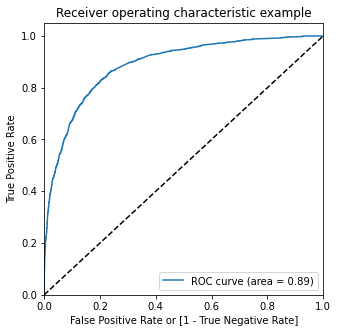

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

* Area under the curve is 0.89, model is good

# Finding Optimal Cutoff Point

In [89]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.144541,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.185007,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.878464,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.653156,7987,1,1,1,1,1,1,1,1,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.602897  0.972200  0.371575
0.2   0.2  0.759093  0.909240  0.665045
0.3   0.3  0.802551  0.852003  0.771575
0.4   0.4  0.815934  0.783729  0.836108
0.5   0.5  0.817981  0.706460  0.887836
0.6   0.6  0.802551  0.605478  0.925992
0.7   0.7  0.783656  0.519215  0.949296
0.8   0.8  0.766493  0.439493  0.971319
0.9   0.9  0.725398  0.306623  0.987708


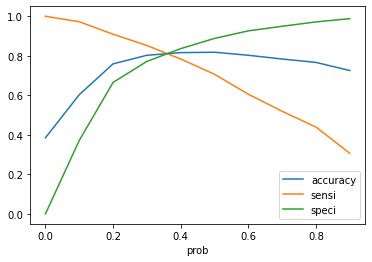

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.144541,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.185007,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.878464,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.653156,7987,1,1,1,1,1,1,1,1,0,0,0,1


# Assigning Lead Score to the Training data

In [93]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.188946,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.144541,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.185007,9226,0,1,1,0,0,0,0,0,0,0,0,0,19
3,1,0.878464,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.653156,7987,1,1,1,1,1,1,1,1,0,0,0,1,65


# Model Evaluation

In [94]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8096362777515352


In [95]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3119,  786],
       [ 423, 2023]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8270645952575634


In [98]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7987195902688861


The difference between Sensitivity and Specificity had been narrowed down

# Making predictions on the test set

Scaling the test data

In [99]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [100]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [101]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.124910
1490    0.968340
7936    0.107650
4216    0.871881
3830    0.126845
1800    0.624305
6507    0.364079
4821    0.293343
4223    0.927587
4714    0.185007
dtype: float64

In [102]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3271,0.124910
1490,0.968340
7936,0.107650
4216,0.871881
3830,0.126845


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [104]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [105]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [107]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.124910
1,1,1490,0.968340
2,0,7936,0.107650
3,1,4216,0.871881
4,0,3830,0.126845


In [108]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [109]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [110]:
# Let's see the head of y_pred_final
y_pred_final.head()


,Prospect ID,Converted,Converted_prob
0,3271,0,0.124910
1,1490,1,0.968340
2,7936,0,0.107650
3,4216,1,0.871881
4,3830,0,0.126845


In [111]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [112]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.124910,0
1,1490,1,0.968340,1
2,7936,0,0.107650,0
3,4216,1,0.871881,1
4,3830,0,0.126845,0


In [113]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8024237972824091


In [114]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1383,  351],
       [ 187,  802]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8109201213346815


In [117]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7975778546712803


# Assigning Lead Score to the Testing data

In [118]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.124910,0,12
1,1490,1,0.968340,1,97
2,7936,0,0.107650,0,11
3,4216,1,0.871881,1,87
4,3830,0,0.126845,0,13


Test Data pedictions:
* Accuracy : 80%
* Sensitivity : 81%
* Specificity: 80%

# Finding out the Important Features from our final model

In [119]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.947840
Lead Source_Reference                                   3.372776
What is your current occupation_Working Professional    2.615372
Last Activity_Had a Phone Conversation                  1.827924
const                                                   1.285159
Total Time Spent on Website                             1.104736
Lead Source_Olark Chat                                  1.098309
Lead Origin_Lead Import                                 0.927692
Last Activity_Converted to Lead                        -1.049381
Lead Origin_Landing Page Submission                    -1.122608
Specialization_Others                                  -1.126013
Last Activity_Email Bounced                            -1.230402
Last Activity_Olark Chat Conversation                  -1.334259
Last Notable Activity_Email Opened                     -1.442384
Last Notable Activity_Olark Chat Conversation          -1.487707
Do Not Email             